In [ ]:
!pip install tensorflow  tensorflow_io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

!apt-get install -y p7zip-full


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-7build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [16]:
!7za x /content/gdrive/MyDrive/Final_Project/speech_recognition/



7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/Final_Project/                                                  0M 2 Scan /content/gdrive/MyDrive/Final_Project/speech_recognition/yes/                                                                          71M 2380 Scan /content/gdrive/MyDrive/Final_Project/speech_recognition/no/                                                                           

#**Importing Data**

In [55]:
%cd ..
%cd content
%cd gdrive
%cd MyDrive
%cd Final_Project
%cd speech_recognition

/
/content
/content/gdrive
/content/gdrive/MyDrive
/content/gdrive/MyDrive/Final_Project
/content/gdrive/.shortcut-targets-by-id/1hRkPWUB64sTrv7F2yuxBO1zcgMGyB81b/speech_recognition


In [24]:
def load_wav_16k_mono(filename):
  #load encoded wav file
  file_contents = tf.io.read_file(filename)
  #Decode wav
  wav, sample_rate  = tf.audio.decode_wav(file_contents, desired_channels = 1)
  #Removes trailing axis
  wav = tf.squeeze(wav, axis = -1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out = 16000)
  return wav

In [26]:
yes = load_wav_16k_mono('/content/gdrive/MyDrive/Final_Project/speech_recognition/yes/004ae714_nohash_0.wav')

In [28]:
no = load_wav_16k_mono('/content/gdrive/MyDrive/Final_Project/speech_recognition/no/012c8314_nohash_0.wav')

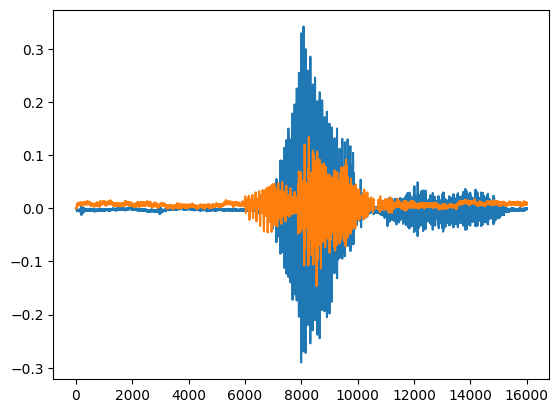

In [29]:
plt.plot(yes)
plt.plot(no)
plt.show()

#**My sound variables**

In [49]:
#yes = os.path.join('/content/gdrive/MyDrive/Final_Project/speech_recognition', 'yes')

In [33]:
#yes = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/yes')
#no = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/no')

In [32]:
#one = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/one')
#two = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/two')
#three = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/three')
#four = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/four')
#five = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/five')
#six = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/six')
#seven = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/seven')
#eight = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/eight')
#nine = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/nine')

In [34]:
#up = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/up')
#down = os.listdir('/content/gdrive/MyDrive/Final_Project/speech_recognition/down')

In [35]:
#yes = yes[:500]
#no = no[:500]

In [37]:
#one = one[:500]
#two = two[:500]
#three = three[:500]
#four = four[:500]
#five = five[:500]
#six = six[:500]
#seven = seven[:500]
#eight = eight[:500]
#nine = nine[:500]

In [38]:
#up = up[:500]
#down = down[:500]

#**Create TensorFlow Datasets**

In [148]:
tf_yes = tf.data.Dataset.list_files(os.path.join('yes', '*.wav')).take(500)
tf_no = tf.data.Dataset.list_files(os.path.join('no', '*.wav')).take(500)

In [149]:
tf_one = tf.data.Dataset.list_files(os.path.join('one', '*.wav')).take(500)
tf_two = tf.data.Dataset.list_files(os.path.join('two', '*.wav')).take(500)
tf_three = tf.data.Dataset.list_files(os.path.join('three', '*.wav')).take(500)
tf_four = tf.data.Dataset.list_files(os.path.join('four', '*.wav')).take(500)
tf_five = tf.data.Dataset.list_files(os.path.join('five', '*.wav')).take(500)
tf_six = tf.data.Dataset.list_files(os.path.join('six', '*.wav')).take(500)
tf_seven = tf.data.Dataset.list_files(os.path.join('seven', '*.wav')).take(500)
tf_eight = tf.data.Dataset.list_files(os.path.join('eight', '*.wav')).take(500)
tf_nine = tf.data.Dataset.list_files(os.path.join('nine', '*.wav')).take(500)

In [150]:
tf_up = tf.data.Dataset.list_files(os.path.join('up', '*.wav')).take(500)
tf_down = tf.data.Dataset.list_files(os.path.join('down', '*.wav')).take(500)

In [151]:
tf_up.as_numpy_iterator().next()

b'up/211ccd2e_nohash_0.wav'

In [152]:
len(tf_up)

500

#**Add labels**

In [75]:
yes = tf.data.Dataset.zip((tf_yes, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_yes),), 0))))
no = tf.data.Dataset.zip((tf_no, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_no),), 1))))

In [74]:
one = tf.data.Dataset.zip((tf_one, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_one),), 2))))
two = tf.data.Dataset.zip((tf_two, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_two),), 3))))
three = tf.data.Dataset.zip((tf_three, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_three),), 4))))
four = tf.data.Dataset.zip((tf_four, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_four),), 5))))
five = tf.data.Dataset.zip((tf_five, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_five),), 6))))
six = tf.data.Dataset.zip((tf_six, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_six),), 7))))
seven = tf.data.Dataset.zip((tf_seven, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_seven),), 8))))
eight = tf.data.Dataset.zip((tf_eight, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_eight),), 9))))
nine = tf.data.Dataset.zip((tf_nine, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_nine),), 10))))

In [76]:
up = tf.data.Dataset.zip((tf_up, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_up),), 11))))
down = tf.data.Dataset.zip((tf_down, tf.data.Dataset.from_tensor_slices(tf.fill((len(tf_down),), 12))))

In [85]:
datasets = [yes, no, one, two, three, four, five, six, seven, eight, nine, up, down]

In [92]:
from functools import reduce


In [90]:
merged_dataset_loop = None
for dataset in datasets:
    if merged_dataset_loop is None:
        merged_dataset_loop = dataset
    else:
        merged_dataset_loop = merged_dataset_loop.concatenate(dataset)

In [93]:
merged_dataset_reduce = reduce(lambda d1, d2: d1.concatenate(d2), datasets)


In [109]:
dataset = merged_dataset_reduce.shuffle(buffer_size=10000)

In [82]:
one.as_numpy_iterator().next()

(b'one/4cb874bb_nohash_0.wav', 2)

In [83]:
two.as_numpy_iterator().next()

(b'two/810c99be_nohash_0.wav', 3)

In [113]:
dataset.as_numpy_iterator().next()

(b'nine/52bfbce8_nohash_0.wav', 10)

#**Determine average lenght of Yes**

In [114]:
lengths = []
for file in os.listdir(os.path.join('yes')):
    tensor_wave = load_wav_16k_mono(os.path.join('yes', file))
    lengths.append(len(tensor_wave))

In [118]:
tf.math.reduce_mean(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=15766>

In [119]:
tf.math.reduce_min(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=8022>

In [120]:
tf.math.reduce_max(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=16000>

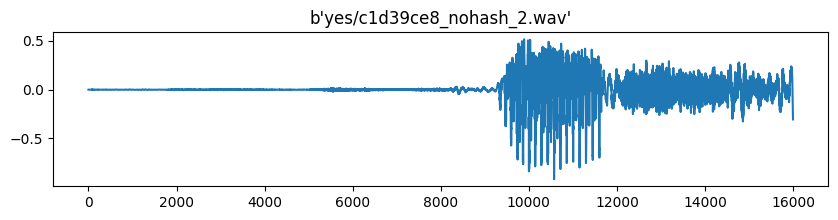

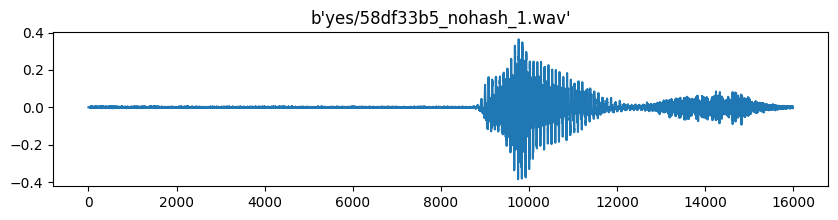

In [133]:
for ind in range(2):
  item = yes.shuffle(5000).as_numpy_iterator().next()
  path = item[0]
  wave = load_wav_16k_mono(path)
  plt.figure(figsize=(10,2))
  plt.plot(wave)
  plt.title(path)
  plt.show()


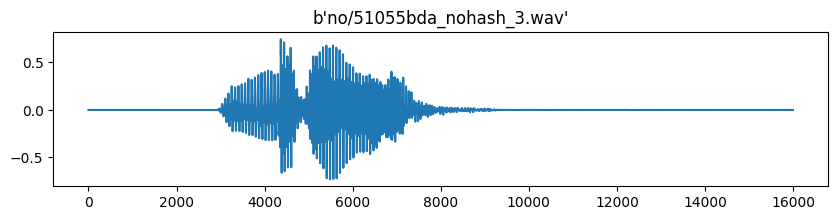

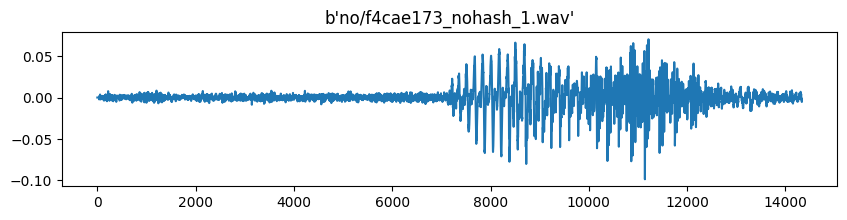

In [134]:
for ind in range(2):
  item = no.shuffle(5000).as_numpy_iterator().next()
  path = item[0]
  wave = load_wav_16k_mono(path)
  plt.figure(figsize=(10,2))
  plt.plot(wave)
  plt.title(path)
  plt.show()

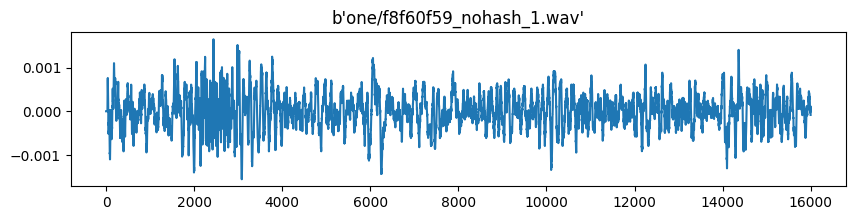

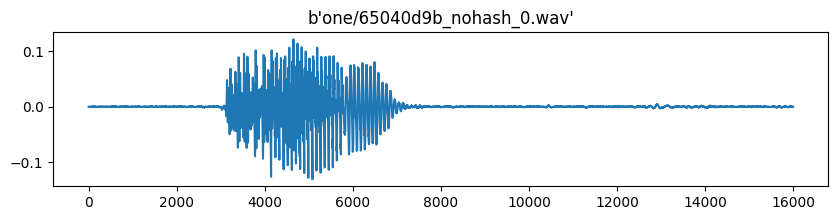

In [135]:
for ind in range(2):
  item = one.shuffle(5000).as_numpy_iterator().next()
  path = item[0]
  wave = load_wav_16k_mono(path)
  plt.figure(figsize=(10,2))
  plt.plot(wave)
  plt.title(path)
  plt.show()

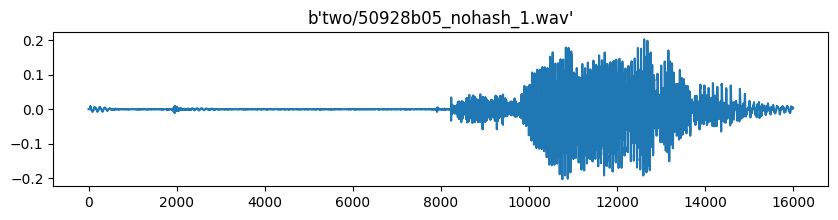

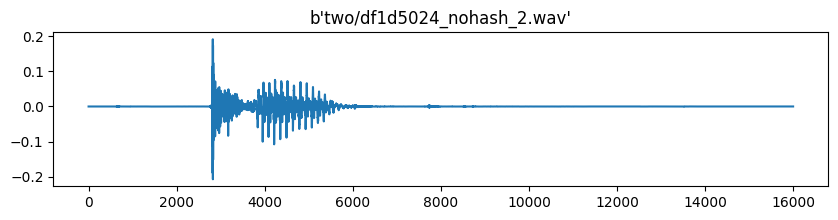

In [136]:
for ind in range(2):
  item = two.shuffle(5000).as_numpy_iterator().next()
  path = item[0]
  wave = load_wav_16k_mono(path)
  plt.figure(figsize=(10,2))
  plt.plot(wave)
  plt.title(path)
  plt.show()

#**Preprocessing**

In [121]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

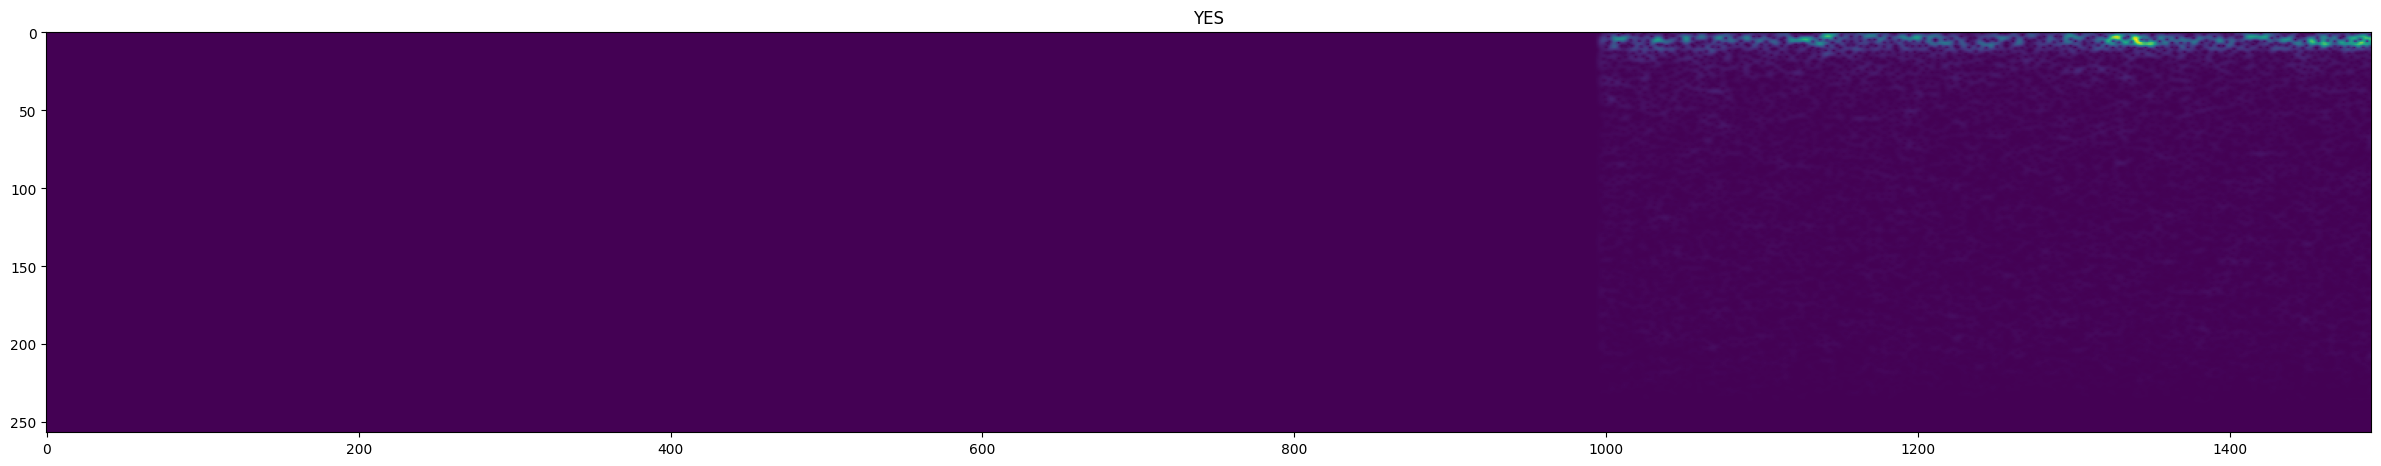

In [138]:
filepath, label = yes.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.title("YES")
plt.show()

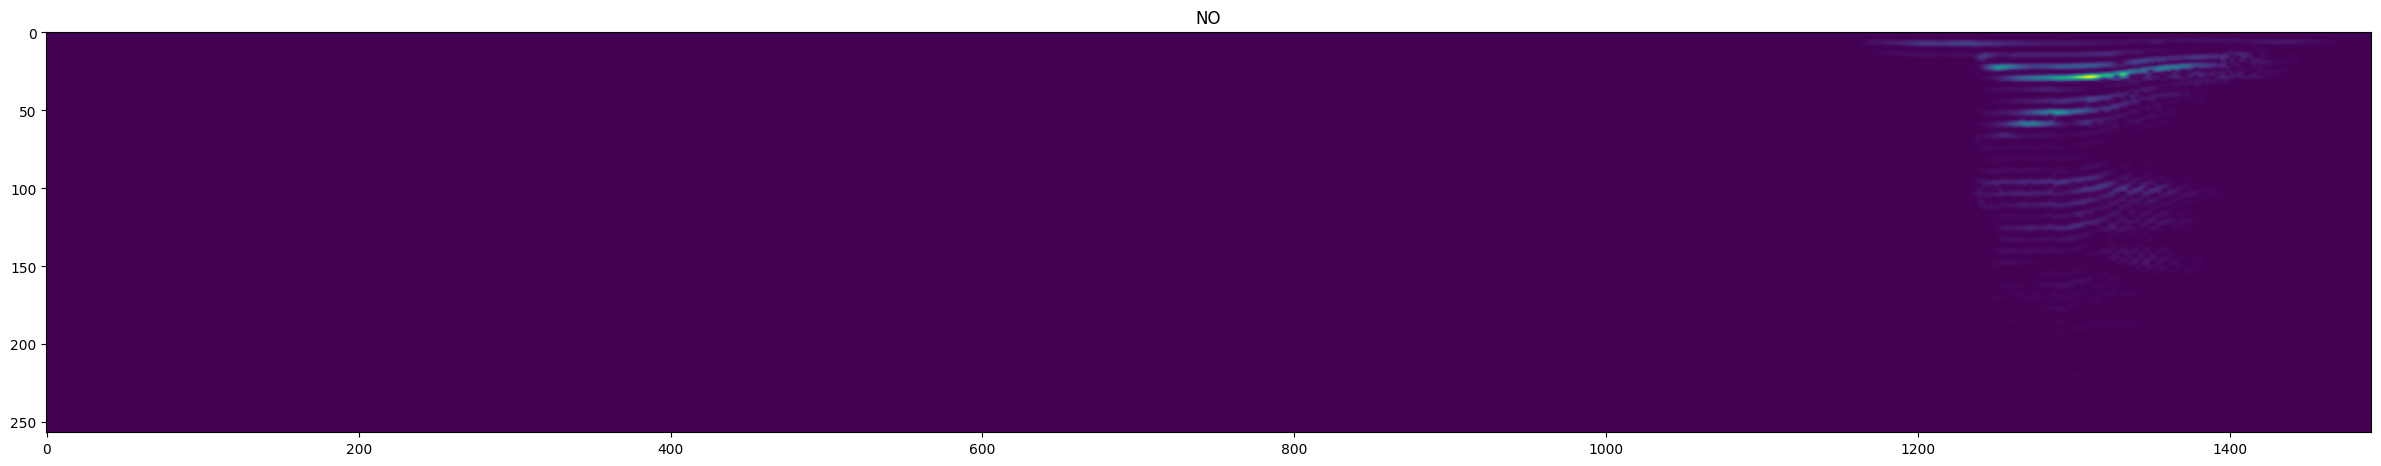

In [139]:
filepath, label = no.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.title("NO")
plt.show()

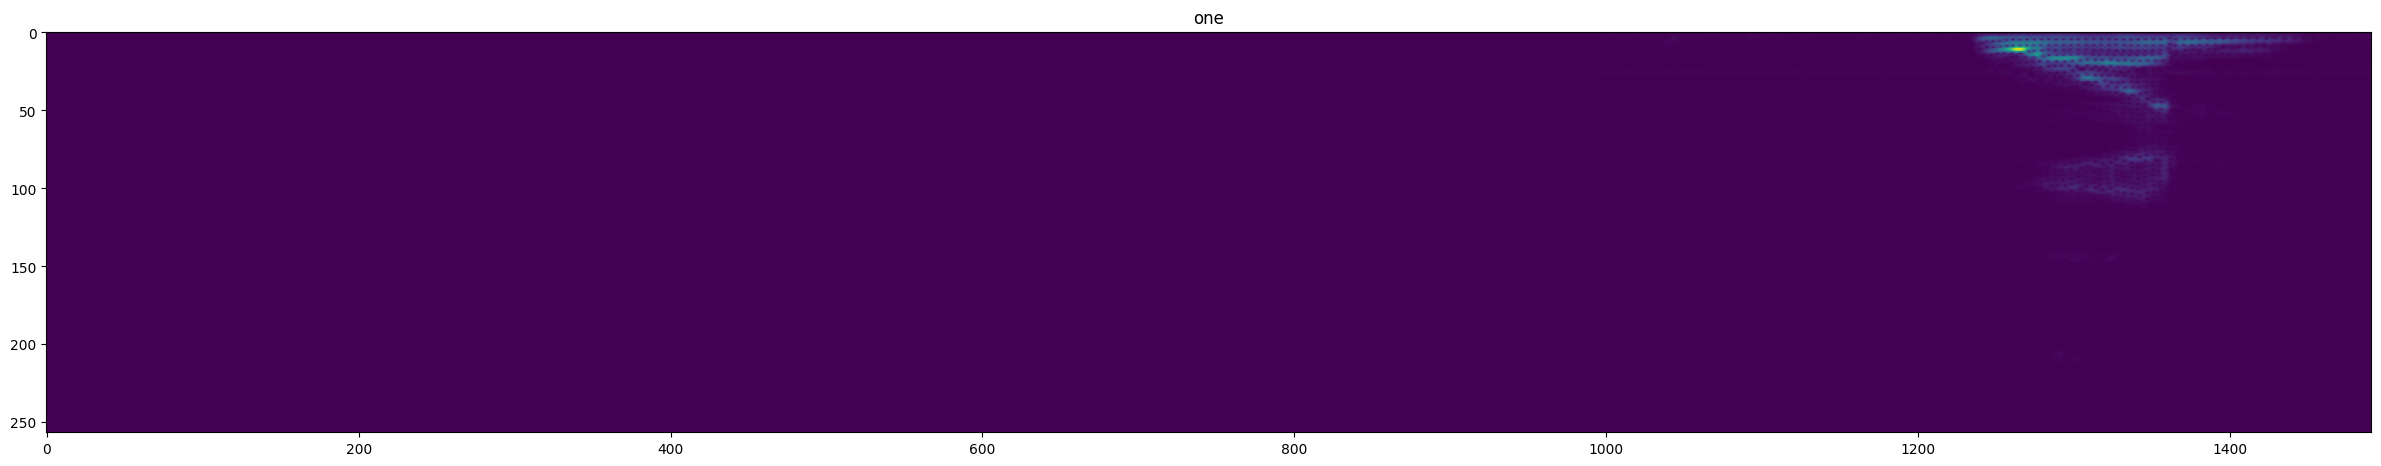

In [140]:
filepath, label = one.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.title("one")
plt.show()

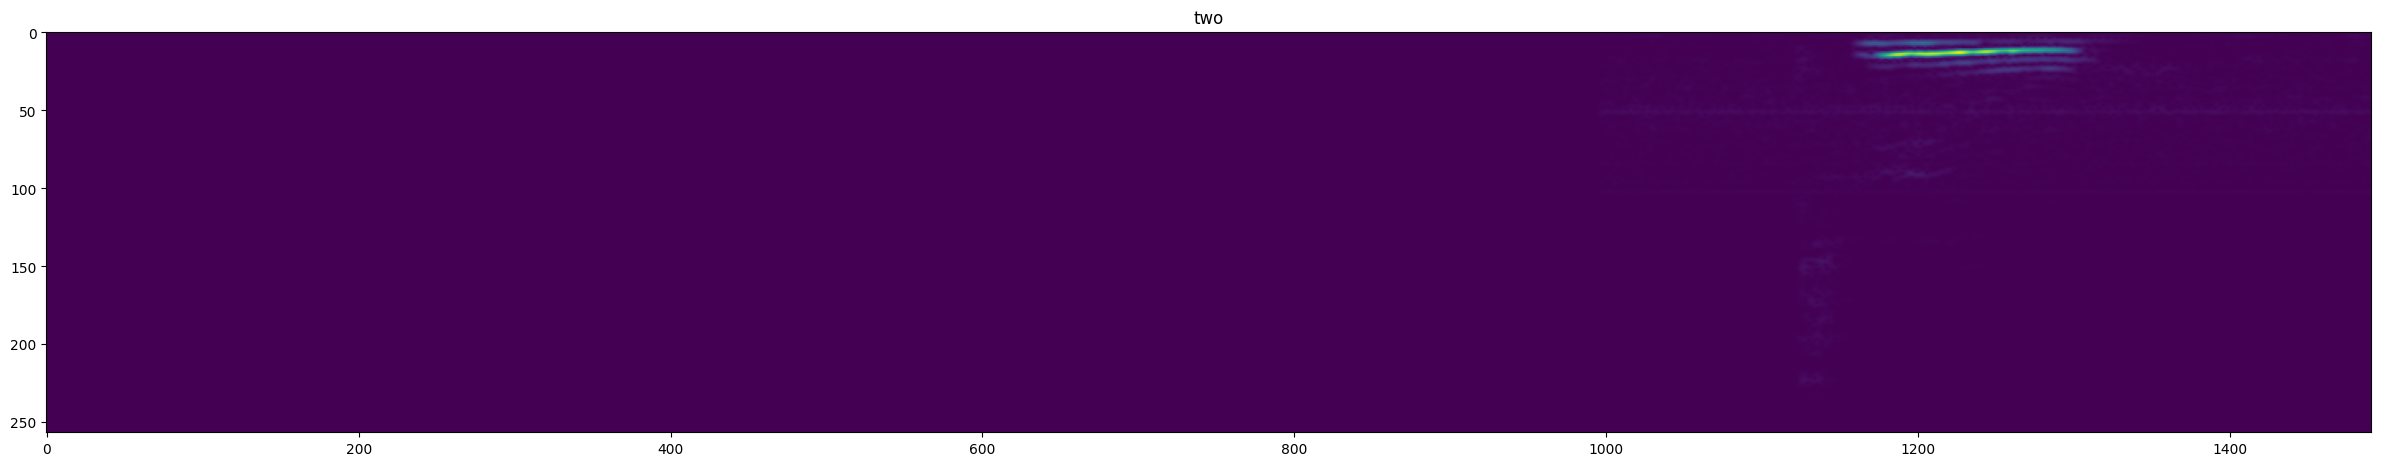

In [141]:
filepath, label = two.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.title("two")
plt.show()

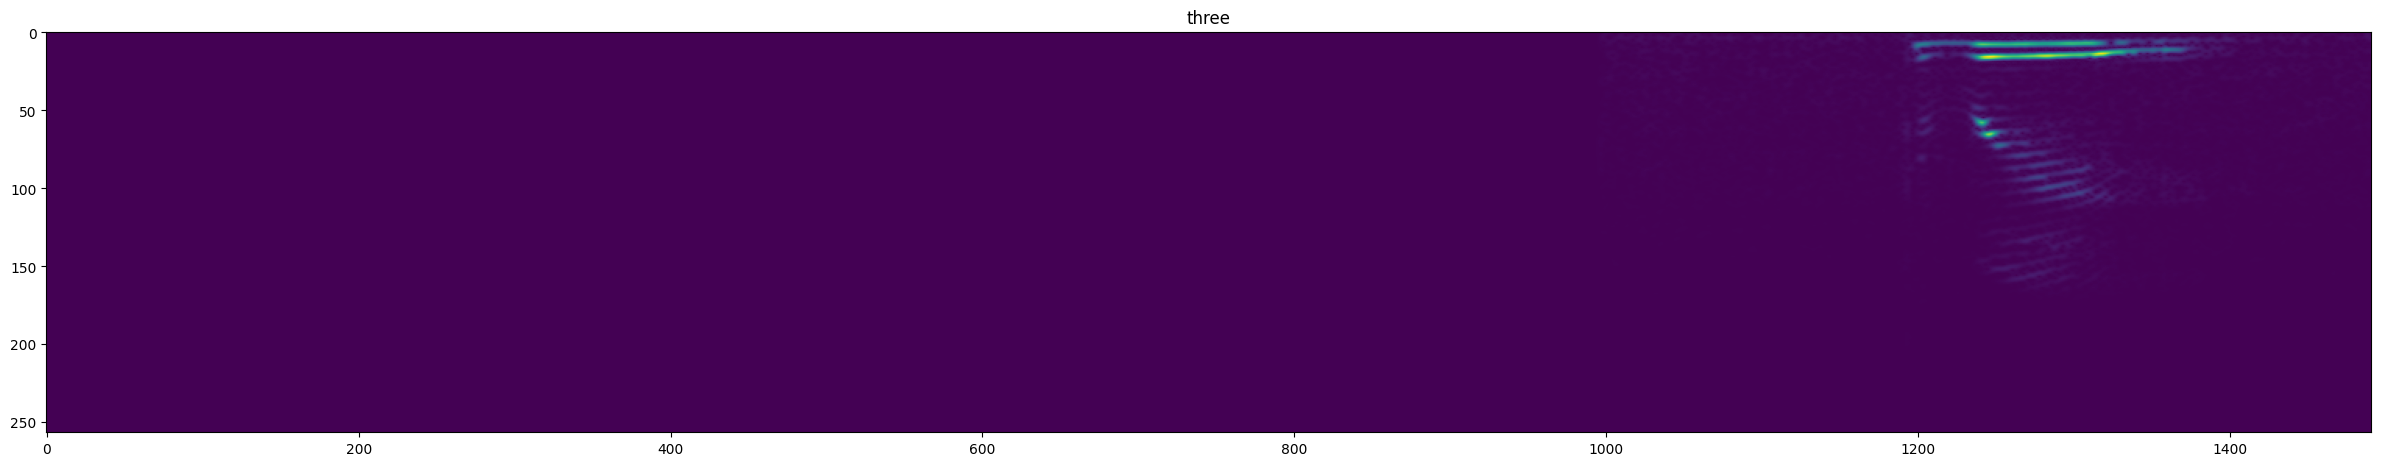

In [142]:
filepath, label = three.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.title("three")
plt.show()

#**Create Training and Testing Partitions**

In [144]:
data = dataset.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [145]:
train = data.take(500)
test = data.skip(500).take(120)

In [146]:
samples, labels = train.as_numpy_iterator().next()


In [147]:
samples.shape


(16, 1491, 257, 1)